In [1]:
import pandas as pd
import numpy as np
import math 
import os 
from datetime import datetime, timedelta
import pymap3d # python3 -m pip install pymap3d
import random
import pickle
from scipy import stats
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
# conda install -c conda-forge tikzplotlib
import tikzplotlib 
from bokeh.plotting import figure, show, output_notebook, output_file, reset_output, save
from bokeh.layouts import gridplot, row, column
from bokeh.models import Range1d
output_notebook() 


Loading BokehJS ...

In [2]:
dataset="cabspotting" # OPTIONS ARE: cabspotting privamov
user="oilrag" # Examples: abboip oilrag 51 90 14
sol_file='solutions/'+dataset+'/'+user
Colors = ['navy', 'darkorange', 'red', 
         'blue', 'teal', 'indigo',  'darkred', 'purple',  'darkgreen']
import matplotlib as mpl

mpl.rcParams['lines.markersize'] = 4


In [3]:
save_data_raw = pickle.load( open( sol_file+"/save_data_raw.pkl", "rb" ) )
Timer = save_data_raw['Timer'].to_numpy()
xr = save_data_raw['xr'].to_numpy()
yr = save_data_raw['yr'].to_numpy()

save_data = pickle.load( open( sol_file+"/save_data.pkl", "rb" ) )
Time = save_data['Time'].to_numpy()
xs = save_data['xs'].to_numpy()
ys = save_data['ys'].to_numpy()
bs = save_data['bs'].to_numpy()

ts = Time[1] - Time[0]  # Sampling time
tmax = Time[-1]  # Final time
nt = len(Time)
print(nt)

2252


In [4]:
# Vector for plotting, removed the non-transmitted instants
Timep = Time[bs != 0]
xsp = xs[bs != 0] 
ysp = ys[bs != 0] 

In [5]:

fig = figure(plot_width=900, plot_height=450)
fig.line(Timer, xr, line_color='navy', legend_label="x", alpha=0.2)
fig.circle(Timer, xr, line_color='navy', legend_label="x", fill_alpha=0.2, alpha=0.2)
fig.line(Timep, xsp, line_color='navy', legend_label="x")
fig.circle(Timep, xsp, line_color='navy', color = 'cyan', legend_label="x")
fig.line(Timer, yr, line_color='red', legend_label="y", alpha=0.2)
fig.circle(Timer, yr, line_color='red', legend_label="y", fill_alpha=0.2, alpha=0.2)
fig.line(Timep, ysp, line_color='red', legend_label="y")
fig.circle(Timep, ysp, line_color='red', color = 'pink', legend_label="y")
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "distance [m]"
show(fig)

fig = figure(plot_width=900, plot_height=450)
fig.line(xsp, ysp, line_color='navy', legend_label="p")
fig.circle(xsp, ysp, color='navy', legend_label="p")
fig.line(xr, yr, line_color='navy', legend_label="p raw", alpha=0.2)
fig.circle(xr, yr, color='navy', legend_label="p raw", fill_alpha=0.2, alpha=0.2)
fig.xaxis.axis_label = "x"
fig.yaxis.axis_label = "y"
show(fig)


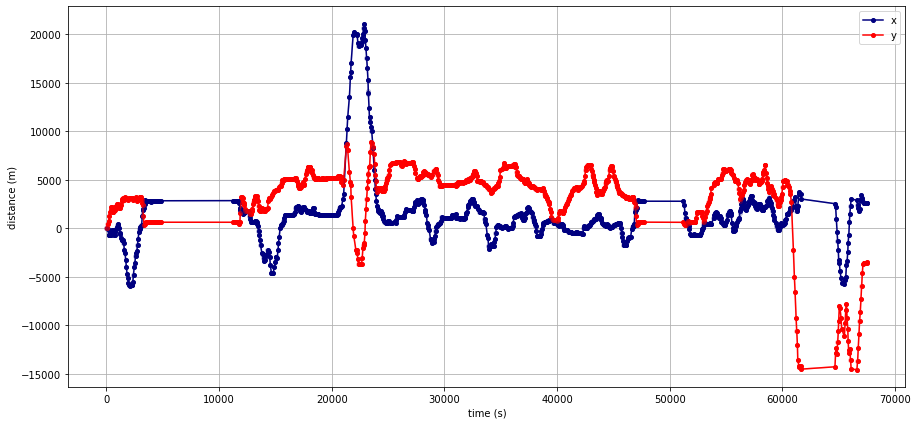

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(Timep, xsp, "o-", color='navy')
plt.plot(Timep, ysp, "o-", color='red')
plt.plot(Timer, xr, "o-", color='navy', alpha=0.2)
plt.plot(Timer, yr, "o-", color='red', alpha=0.2)
plt.xlabel("time (s)")
plt.ylabel("distance (m)")
plt.legend(['x', 'y'])
plt.grid(True)

tikzplotlib.save(sol_file+"/time_evol.tex")


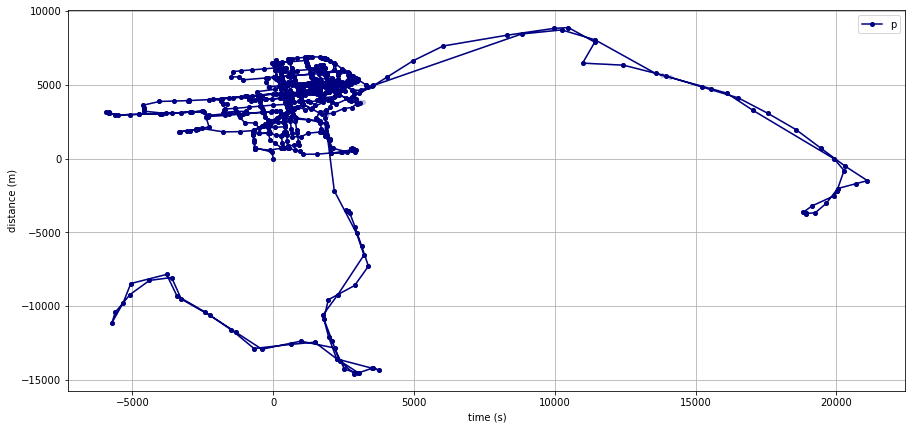

In [7]:
plt.figure(figsize=(15, 7))
plt.plot(xsp, ysp, "o-", color='navy')
plt.plot(xr, yr, "o-", color='navy', alpha=0.2)
plt.xlabel("time (s)")
plt.ylabel("distance (m)")
plt.legend(['p'])
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/xy_evol0.tex")


## Random obfuscation protocol

In [9]:
Data_real = pickle.load( open( sol_file+"/Data_real.pkl", "rb" ) )
xs = Data_real['x'].to_numpy()
ys = Data_real['y'].to_numpy()
bs = Data_real['b'].to_numpy()
barx = Data_real['barx'].to_numpy()
bary = Data_real['bary'].to_numpy()
priv = Data_real['priv'].to_numpy()

Data_obf = pickle.load( open( sol_file+"/Data_GeoI.pkl", "rb" ) )
x_obf = Data_obf['x'].to_numpy()
y_obf = Data_obf['y'].to_numpy()
d0 = Data_obf['U'].to_numpy()
d1 = Data_obf['V'].to_numpy()
delta = np.array([d0, d1])
barx_obf = Data_obf['barx'].to_numpy()
bary_obf = Data_obf['bary'].to_numpy()
priv_obf = Data_obf['priv'].to_numpy()
util = Data_obf['util'].to_numpy()


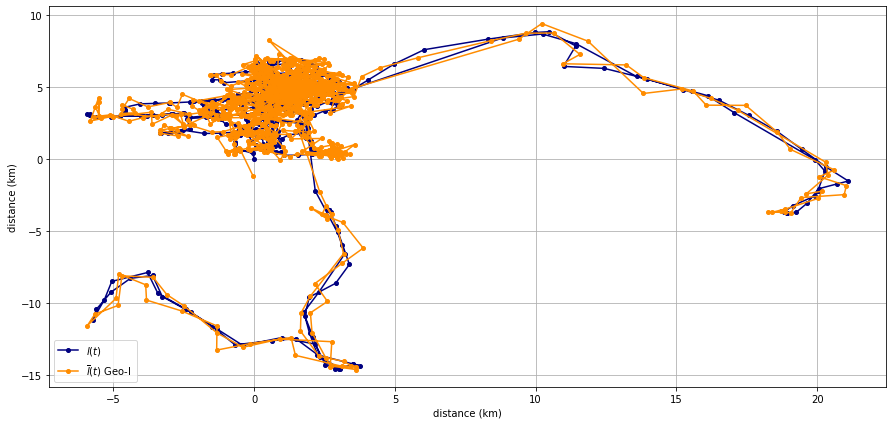

In [11]:
fig = figure(plot_width=900, plot_height=450)
fig.line(xsp, ysp, line_color='navy', legend_label="p")
fig.circle(np.multiply(xs,bs), np.multiply(ys,bs), color='navy', legend_label="p")
# fig.circle(np.multiply(xs,bs), np.multiply(ys,bs), color='navy', legend_label="p")
fig.circle(np.multiply(x_obf,bs), np.multiply(y_obf,bs), color='orange', legend_label="p obf")
#fig.line(barx, bary, line_color='navy', legend_label="centr", alpha=0.2)
#fig.circle(barx, bary, color='navy', legend_label="centr", fill_alpha=0.2, alpha=0.2)
#fig.line(barx_obf, bary_obf, line_color='orange', legend_label="centr obf", alpha=0.2)
#fig.circle(barx_obf, bary_obf, color='orange', legend_label="centr obf", fill_alpha=0.2, alpha=0.2)
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "distance (m)"
show(fig)

plt.figure(figsize=(15, 7))
plt.plot(xsp/1000, ysp/1000, "o-", color=Colors[0])
#plt.plot(barx, bary, "o-", color=Colors[0], alpha=0.2)
#plt.plot(np.multiply(x_obf,bs), np.multiply(y_obf,bs), "o", color=Colors[1])
plt.plot(x_obf[bs!=0]/1000, y_obf[bs!=0]/1000, "o-", color=Colors[1])
#plt.plot(barx_obf, bary_obf, "o-", color=Colors[1], alpha=0.2)
#plt.plot(np.multiply(xs,bs), np.multiply(ys,bs), "o-", color=Colors[0])
plt.xlabel("distance (km)")
plt.ylabel("distance (km)")
plt.legend(['$l(t)$', '$\overline{l}(t)$ Geo-I '],loc='lower left')
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/xy_evol1_v3.tex")

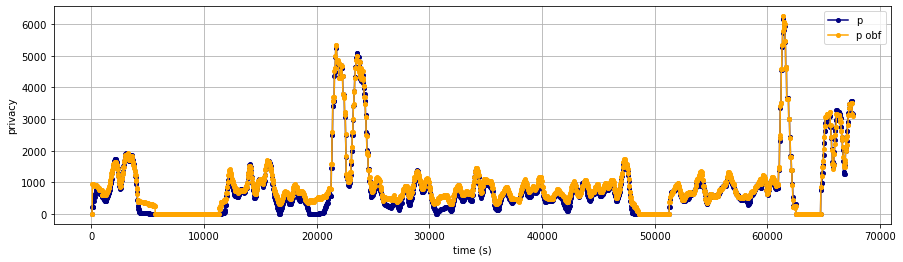

In [12]:
fig = figure(plot_width=900, plot_height=250)
fig.line(Time, priv, line_color='navy', legend_label="p")
fig.circle(Time, priv, color='navy', legend_label="p obf")
fig.line(Time, priv_obf, line_color='orange', legend_label="p obf")
fig.circle(Time, priv_obf, color='orange', legend_label="p obf")
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "privacy"
show(fig)

plt.figure(figsize=(15, 4))
plt.plot(Time, priv, "o-", color='navy')
plt.plot(Time, priv_obf, "o-", color='orange')
plt.xlabel("time (s)")
plt.ylabel("privacy")
plt.legend(['p', 'p obf'])
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/time_priv1.tex")

C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


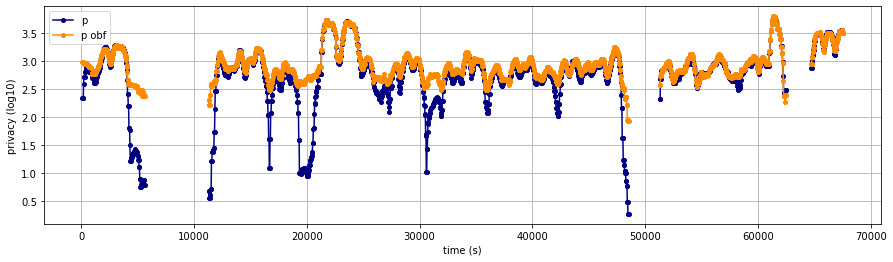

In [13]:
fig = figure(plot_width=900, plot_height=250)
fig.line(Time, np.log10(priv), line_color='navy', legend_label="p")
fig.circle(Time, np.log10(priv), color='navy', legend_label="p obf")
fig.line(Time, np.log10(priv_obf), line_color='orange', legend_label="p obf")
fig.circle(Time, np.log10(priv_obf), color='orange', legend_label="p obf")
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "privacy (log10)"
show(fig)


plt.figure(figsize=(15, 4))
plt.plot(Time, np.log10(priv), "o-", color=Colors[0])
plt.plot(Time, np.log10(priv_obf), "o-", color=Colors[1])
plt.xlabel("time (s)")
plt.ylabel("privacy (log10)")
plt.legend(['p', 'p obf'])
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/time_priv_log1.tex")

C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


151.08479344838392


C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


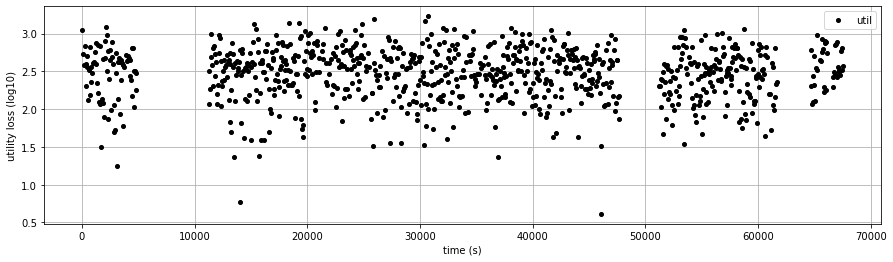

In [14]:
fig = figure(plot_width=900, plot_height=250)
fig.circle(Time, np.log10(util), color=Colors[1], legend_label="u")
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "utility loss (log10)"
show(fig)
print(util.mean())

plt.figure(figsize=(15, 4))
plt.plot(Time, np.log10(util), "o", color='k')
plt.xlabel("time (s)")
plt.ylabel("utility loss (log10)")
plt.legend(['util'])
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/time_util_log1_v2.tex")

## Model predictive control

In [15]:
# Load data MPC
horizons = pickle.load( open( sol_file+"/Horizons_MPC.pkl", "rb" ) )
Data_MPC = pickle.load( open( sol_file+"/Data_MPC.pkl", "rb" ) )


In [16]:
#solution time statics
for h in horizons:
    tiempos=Data_MPC[h]['time']
    print('Horizon ',h)
    print(tiempos.loc[tiempos>0].describe())

Horizon  1
count    883.000000
mean       0.126068
std        0.043537
min        0.067822
25%        0.103619
50%        0.117714
75%        0.135639
max        0.589422
Name: time, dtype: float64
Horizon  2
count    883.000000
mean       0.232873
std        0.077748
min        0.113272
25%        0.183060
50%        0.222408
75%        0.263916
max        0.796841
Name: time, dtype: float64
Horizon  3
count    882.000000
mean       0.370830
std        0.150198
min        0.073837
25%        0.315707
50%        0.369258
75%        0.432368
max        1.332137
Name: time, dtype: float64
Horizon  4
count    882.000000
mean       0.450139
std        0.165287
min        0.156552
25%        0.352283
50%        0.406227
75%        0.500445
max        1.831736
Name: time, dtype: float64
Horizon  5
count    881.000000
mean       0.469639
std        0.137042
min        0.144616
25%        0.396441
50%        0.437259
75%        0.498642
max        1.680735
Name: time, dtype: float64
Horizon  1

In [20]:
print(len(xs))
print(len(np.array(Data_MPC[h].x)))

2252
2242


In [26]:
# Privacy evaluation
ntemp = len(xs)
for h in horizons:
    ntemp = np.min([ntemp,len(np.array(Data_MPC[h].x))])

p_raw = np.array(priv[0:ntemp]).mean()
p_obf = np.array(priv_obf[0:ntemp]).mean()
print("Privacy raw: ", p_raw)
print("Privacy Gauss: ", p_obf, "  ", (p_obf-p_raw)/p_raw)

P_mpc = []
Pper_mpc = []
for h in horizons:
    p_mpc = np.array(Data_MPC[h].loc[Data_MPC[h].util>0].priv)[0:ntemp].mean()
    print("Privacy MPC: h = " + str(h) + "  ", p_mpc, "  ", (p_mpc-p_raw)/p_raw, " ",(p_mpc-p_obf)/p_obf)
    
    P_mpc += [p_mpc]
    Pper_mpc += [(p_mpc-p_raw)/p_raw]

util_mpc = Data_MPC[h].util
Util_mpc = pd.DataFrame(util_mpc)
Util_mpc[Util_mpc > 0].describe()


Privacy raw:  804.7168207593153
Privacy Gauss:  905.7124300560394    0.1255045336338646
Privacy MPC: h = 1   1147.8401653838541    0.4263901732547038   0.2673340094414223
Privacy MPC: h = 2   1147.6761084904695    0.42618630415547226   0.2671528736990603
Privacy MPC: h = 3   1097.5520446340465    0.3638984749920072   0.21181073397230227
Privacy MPC: h = 4   1149.9086188659774    0.4289605848936347   0.26961779556766025
Privacy MPC: h = 5   1149.3986214206216    0.42832682475317363   0.2690547057519179
Privacy MPC: h = 10   1157.4166511250776    0.4382906151172055   0.27790743807442775


,util
count,879.000000
mean,383.603770
std,263.045552
min,4.101350
25%,183.681795
50%,332.284261
75%,512.573033
max,1699.562395


Loading BokehJS ...

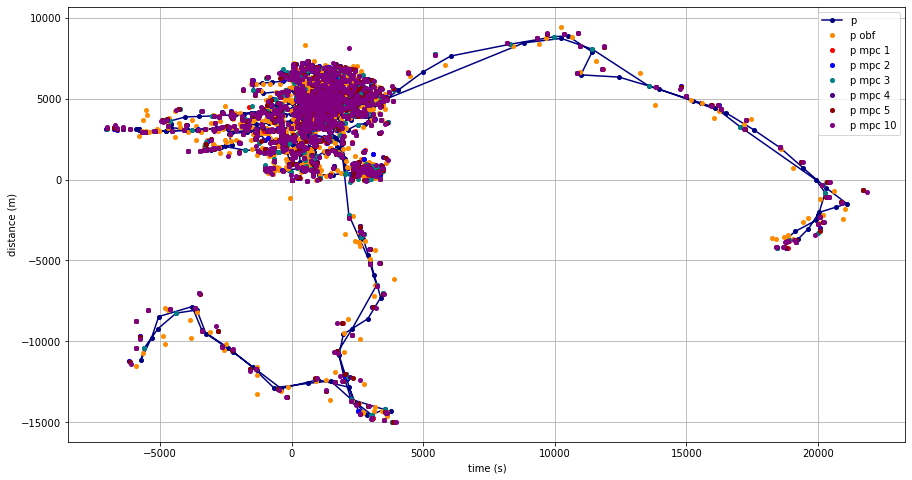

In [30]:
from bokeh.plotting import figure, show, output_notebook, output_file, reset_output, save
from bokeh.layouts import gridplot, row, column
from bokeh.models import Range1d
from numpy import random
output_notebook()

fig = figure(plot_width=900, plot_height=450)
fig.line(xsp, ysp, line_color='navy', legend_label="p")
fig.circle(np.multiply(xs,bs), np.multiply(ys,bs), color='navy', legend_label="p")
fig.line(barx, bary, line_color='navy', legend_label="centr", alpha=0.2)
fig.circle(barx, bary, color='navy', legend_label="centr", fill_alpha=0.2, alpha=0.2)
fig.circle(np.multiply(x_obf,bs), np.multiply(y_obf,bs), color='orange', legend_label="p obf")
#fig.line(barx_obf, bary_obf, line_color='orange', legend_label="centr obf", alpha=0.2)
#fig.circle(barx_obf, bary_obf, color='orange', legend_label="centr obf", fill_alpha=0.2, alpha=0.2)
for h in horizons:
    x_mpc = Data_MPC[h].x
    y_mpc = Data_MPC[h].y
    barx_mpc = Data_MPC[h].barx
    bary_mpc = Data_MPC[h].bary
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    fig.circle(np.multiply(x_mpc,bs[0:len(y_mpc)]), 
           np.multiply(y_mpc,bs[0:len(y_mpc)]), color=color, legend_label="p mpc "+str(h))
    #fig.line(barx_mpc, bary_mpc, line_color=color, legend_label="centr mpc "+str(h), alpha=0.2)
    #fig.circle(barx_mpc, bary_mpc, color=color, legend_label="centr mpc "+str(h), fill_alpha=0.2, alpha=0.2)
fig.xaxis.axis_label = "x"
fig.yaxis.axis_label = "y"
show(fig)


plt.figure(figsize=(15, 8))
plt.plot(xsp, ysp, "o-", color=Colors[0])
# plt.plot(np.multiply(xs,bs), np.multiply(ys,bs), "o-", color=Colors[0])
#plt.plot(barx, bary, "o-", color=Colors[0], alpha=0.2)
plt.plot(np.multiply(x_obf,bs), np.multiply(y_obf,bs), "o", color=Colors[1])
#plt.plot(barx_obf, bary_obf, "o-", color=Colors[1], alpha=0.2)
lgnd = ['p']
#lgnd += ['centr']
lgnd += ['p obf']
#lgnd += ['centr obf']
plt.legend(['p'])
plt.grid(True)
i = 2
for h in horizons:
    x_mpc = Data_MPC[h].x
    y_mpc = Data_MPC[h].y
    barx_mpc = Data_MPC[h].barx
    bary_mpc = Data_MPC[h].bary
    plt.plot(np.multiply(x_mpc,bs[0:len(y_mpc)]), 
           np.multiply(y_mpc,bs[0:len(y_mpc)]), "o", color=Colors[i])
    lgnd += ["p mpc "+str(h)]
    #plt.plot(barx_mpc, bary_mpc, "o-", color=Colors[i], alpha=0.2)
    #lgnd += ["centr mpc "+str(h)]
    i += 1
plt.xlabel("time (s)")
plt.ylabel("distance (m)")
plt.legend(lgnd)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/xy_evol_mpc.tex")

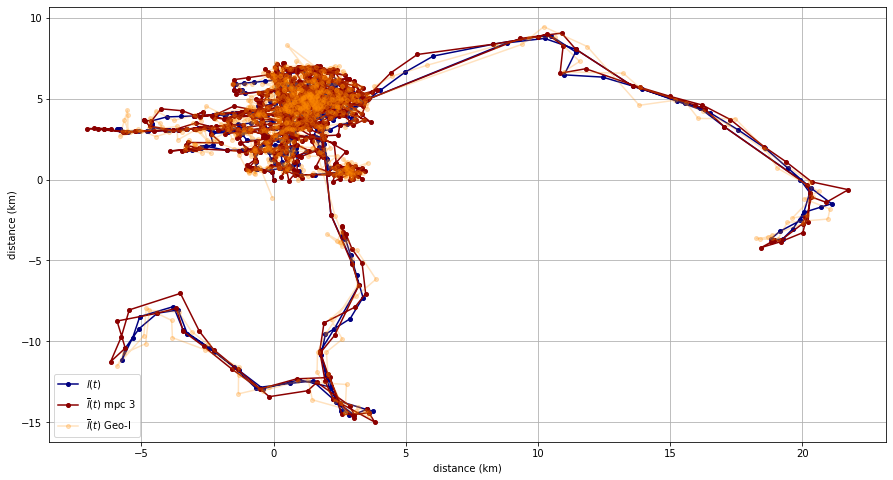

In [32]:
#p vs mpc-1 y 15
h=3
#h=1 color 2
#h=15 color 6
plt.figure(figsize=(15, 8))
plt.plot(xsp/1000, ysp/1000, "o-", color=Colors[0])
#plt.plot(x_obf[bs!=0], y_obf[bs!=0], "o-", color=Colors[1])

lgnd = ['$l(t)$']#, '$\overline{l}(t)$ Geo-I ']
plt.legend(['p'])
plt.grid(True)


x_mpc = Data_MPC[h].x
y_mpc = Data_MPC[h].y
barx_mpc = Data_MPC[h].barx
bary_mpc = Data_MPC[h].bary
plt.plot(x_mpc[bs[0:len(y_mpc)]!=0]/1000, 
           y_mpc[bs[0:len(y_mpc)]!=0]/1000, "o-", color=Colors[6])
lgnd += ["$\overline{l}(t)$ mpc "+str(h)]

plt.plot(x_obf[bs!=0]/1000, y_obf[bs!=0]/1000, "o-", color=Colors[1],alpha=0.25)
lgnd += ['$\overline{l}(t)$ Geo-I']

plt.xlabel("distance (km)")
plt.ylabel("distance (km)")
plt.legend(lgnd,loc='lower left')

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/xy_evol_mpc"+str(h)+"_geoI.tex")

C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\

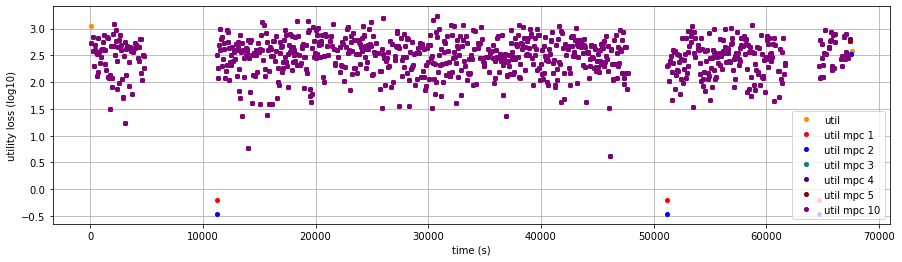

In [33]:
fig = figure(plot_width=900, plot_height=250)
fig.circle(Time, np.log10(util), color=Colors[1], legend_label="util obf")
i = 2
for h in horizons:
    util_mpc = Data_MPC[h].util
    fig.circle(Time[0:len(util_mpc)], np.log10(util_mpc[0:len(util_mpc)]), color=Colors[i], 
               legend_label="util mpc "+str(h))
    i += 1
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "utility loss"
show(fig)


fig = figure(plot_width=900, plot_height=250)
plt.figure(figsize=(15, 4))
plt.plot(Time, np.log10(util), "o", color=Colors[1])
lgnd = ['util']
i = 2
for h in horizons:
    util_mpc = Data_MPC[h].util
    plt.plot(Time[0:len(util_mpc)], np.log10(util_mpc[0:len(util_mpc)]),
             "o", color=Colors[i])
    lgnd += ['util mpc ' + str(h)]
    i += 1
plt.xlabel("time (s)")
plt.ylabel("utility loss (log10)")
plt.legend(lgnd)
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/time_util_mpc_log.tex")


C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\emolina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:

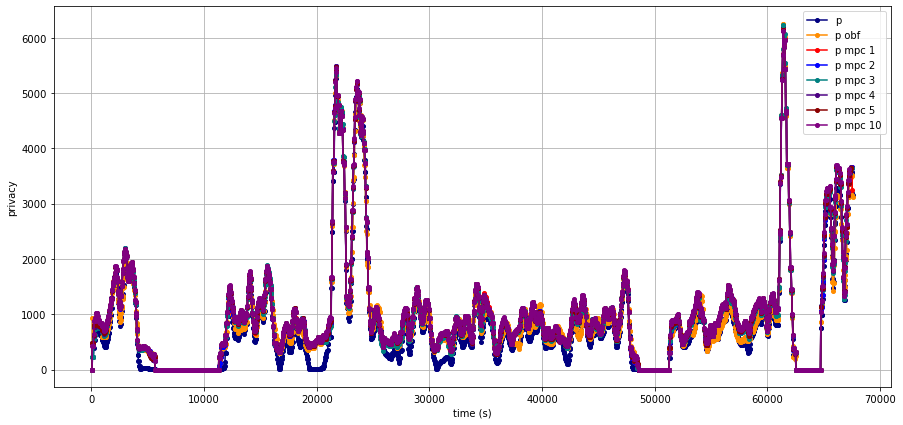

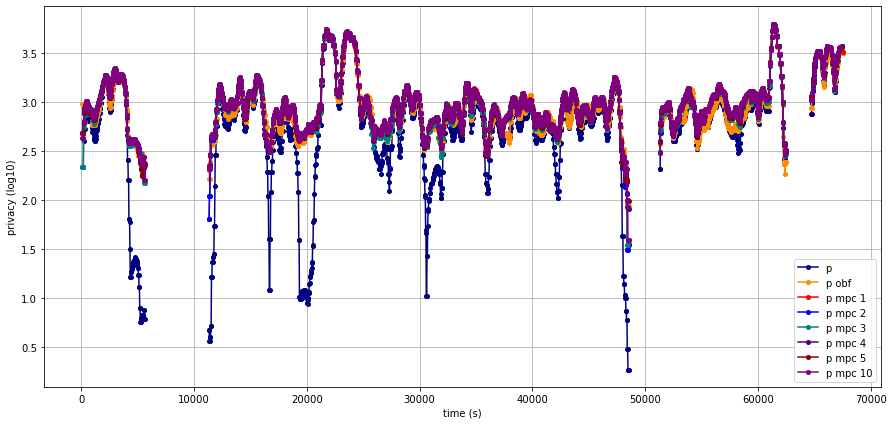

In [34]:
fig = figure(plot_width=900, plot_height=450)
fig.line(Time, priv, line_color=Colors[0], legend_label="p")
fig.circle(Time, priv, color=Colors[0], legend_label="p")
fig.line(Time, priv_obf, line_color=Colors[1], legend_label="p obf")
fig.circle(Time, priv_obf, color=Colors[1], legend_label="p obf")
i = 2
for h in horizons:
    priv_mpc = Data_MPC[h].priv
    fig.line(Time[0:len(priv_mpc)], priv_mpc, line_color=Colors[i], legend_label="p mpc "+str(h))
    fig.circle(Time[0:len(priv_mpc)], priv_mpc[0:len(priv_mpc)], color=Colors[i], 
               legend_label="p mpc "+str(h))
    i += 1
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "privacy"
show(fig)



fig = figure(plot_width=900, plot_height=450)
fig.line(Time, np.log10(priv), line_color=Colors[0], legend_label="p")
fig.circle(Time, np.log10(priv), color=Colors[0], legend_label="p")
fig.line(Time, np.log10(priv_obf), line_color=Colors[1], legend_label="p obf")
fig.circle(Time, np.log10(priv_obf), color=Colors[1], legend_label="p obf")
i = 2
for h in horizons:
    priv_mpc = Data_MPC[h].priv
    fig.line(Time[0:len(priv_mpc)], np.log10(priv_mpc), line_color=Colors[i], legend_label="p mpc "+str(h))
    fig.circle(Time[0:len(priv_mpc)], np.log10(priv_mpc[0:len(priv_mpc)]), color=Colors[i], 
               legend_label="p mpc "+str(h))
    i += 1
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "privacy (log10)"
show(fig)


plt.figure(figsize=(15, 7))
plt.plot(Time, priv, "o-", color=Colors[0])
plt.plot(Time, priv_obf, "o-", color=Colors[1])
lgnd = ['p', 'p obf']
i = 2
for h in horizons:
    priv_mpc = Data_MPC[h].priv
    plt.plot(Time[0:len(priv_mpc)], priv_mpc, "o-", color=Colors[i])
    lgnd += ["p mpc "+str(h)]
    i += 1
plt.xlabel("time (s)")
plt.ylabel("privacy")
plt.legend(lgnd)
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/time_priv_mpc_v3.tex")

plt.figure(figsize=(15, 7))
plt.plot(Time, np.log10(priv), "o-", color=Colors[0])
plt.plot(Time, np.log10(priv_obf), "o-", color=Colors[1])
lgnd = ['p', 'p obf']
i = 2
for h in horizons:
    priv_mpc = Data_MPC[h].priv
    plt.plot(Time[0:len(priv_mpc)], np.log10(priv_mpc), "o-", color=Colors[i])
    lgnd += ["p mpc "+str(h)]
    i += 1
plt.xlabel("time (s)")
plt.ylabel("privacy (log10)")
plt.legend(lgnd)
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/time_priv_mpc_log_v3.tex")


In [ ]:
np.log10(1000)

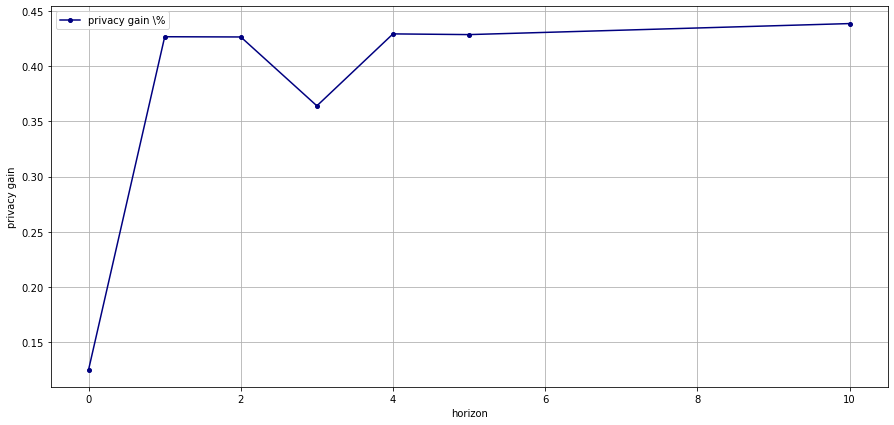

In [35]:
fig = figure(plot_width=900, plot_height=450)
fig.line(np.array([0]+horizons), [(p_obf-p_raw)/p_raw]+Pper_mpc, line_color='navy', 
         legend_label="privacy gain %")
fig.circle(np.array([0]+horizons), [(p_obf-p_raw)/p_raw]+Pper_mpc, line_color='navy', 
           legend_label="privacy gain %")
fig.xaxis.axis_label = "horizon"
fig.yaxis.axis_label = "privacy improvement"
fig.x_range = Range1d(0, max(horizons))
fig.y_range = Range1d(0, max(Pper_mpc)*1.25)
show(fig)


plt.figure(figsize=(15, 7))
plt.plot(np.array([0]+horizons), [(p_obf-p_raw)/p_raw]+Pper_mpc,  "o-", color=Colors[0])
lgnd = ['privacy gain \%']
plt.xlabel("horizon")
plt.ylabel("privacy gain")
plt.legend(lgnd)
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/zh_priv_mpc.tex")


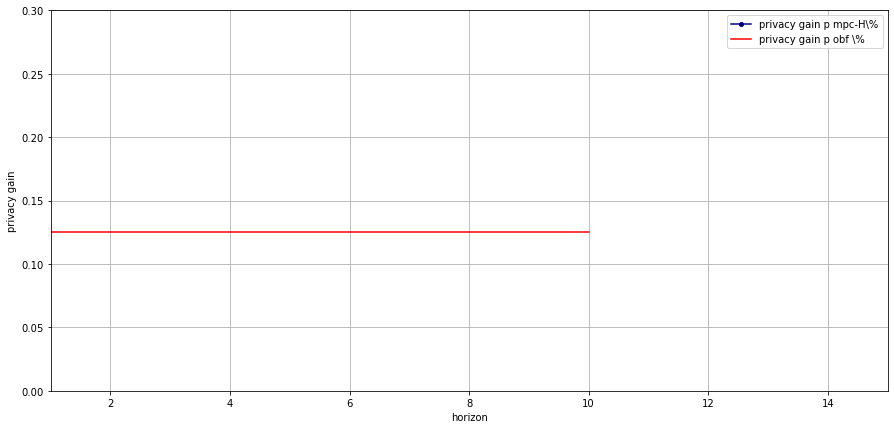

In [36]:
fig = figure(plot_width=900, plot_height=450)
fig.line(np.array(horizons), Pper_mpc, line_color='navy', legend_label="privacy gain %")
fig.circle(np.array(horizons), Pper_mpc, line_color='navy', legend_label="privacy gain %")
fig.line(np.array(horizons), [(p_obf-p_raw)/p_raw]*len(horizons), line_color='red', legend_label="privacy gain gaussian %")
fig.xaxis.axis_label = "horizon"
fig.yaxis.axis_label = "privacy improvement"
fig.x_range = Range1d(1, max(horizons))
fig.y_range = Range1d(0, max(Pper_mpc)*1.25)
show(fig)

plt.figure(figsize=(15, 7))
plt.plot(np.array(horizons), Pper_mpc,  "o-", color=Colors[0],label='privacy gain p mpc-H\%')
#lgnd = ['privacy gain \%']
plt.plot(np.array(horizons), [(p_obf-p_raw)/p_raw]*len(horizons),'r-',label="privacy gain p obf \%")
plt.xlabel("horizon")
plt.ylabel("privacy gain")
plt.ylim([0,0.3])
plt.xlim([1,15])
plt.legend()
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/zh2_priv_mpc_v3.tex")